In [1]:
import mysql.connector as mysql
import database as db
import csv, sys
import image_generator
import feature_extractor
import numpy as np
import os

In [2]:
myDB = db.connect_db("inference")
list_model = ["mobilenet_v1", "inception_v4", "resnet_v1_152"]

In [3]:
from __future__ import division
#import sys
import os
import csv
from tqdm import tqdm
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
# Import datasets, classifiers and performance metrics
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from math import ceil
import util
from threading import Thread
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import NearMiss
#-------------------------------
# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.naive_bayes import GaussianNB

In [4]:
import premodel
csv = 'Author' #choose either Author or Student
pm = premodel.Premodel(csv)

In [5]:
amount_images = 4999 #changes the number of input images
list_premodels = ([('log_reg', 'log_reg', 'log_reg')])
data, first_level_data, second_level_data, third_level_data = pm.cv_training_data(amount_images)
feature_list = ['n_of_keypoints', 'avg_perc_brightness', 'contrast', 'area_by_perim', 'aspect_ratio', 'edge_length1', 'hue1']

<font size="5">**Preparing the data and building classifiers**</font>
<br /><br />
<font size="3">This part of the code is based on the CV_fold_worker() function from authors' code. Here we obtain the features data from csv file, transform it and pass it to classifiers. Then, feature importance in both classifiers is evaluated for each chunk using built-in functions from sklearn library.      
</font>

C:\Users\Asus\miniconda3\envs\esrg\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


Logistic Regression, chunk: range(0, 500)
Feature: 0, Score: -0.37866
Feature: 1, Score: -0.00497
Feature: 2, Score: 0.00480
Feature: 3, Score: -0.03524
Feature: 4, Score: -0.02369
Feature: 5, Score: -0.18366
Feature: 6, Score: -0.00395


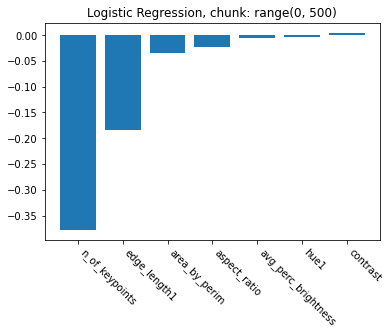

Decision Tree, chunk: range(0, 500)
Feature: 0, Score: 0.96993
Feature: 1, Score: 0.00396
Feature: 2, Score: 0.00311
Feature: 3, Score: 0.00456
Feature: 4, Score: 0.00054
Feature: 5, Score: 0.01790
Feature: 6, Score: 0.00000


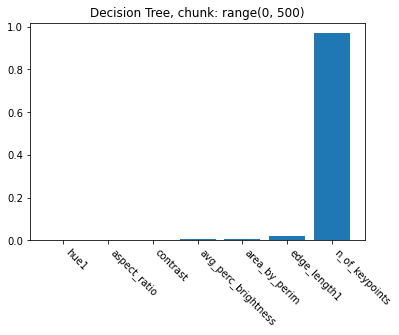

Logistic Regression, chunk: range(500, 1000)
Feature: 0, Score: -0.37641
Feature: 1, Score: -0.01659
Feature: 2, Score: -0.00038
Feature: 3, Score: -0.03695
Feature: 4, Score: -0.02738
Feature: 5, Score: -0.20603
Feature: 6, Score: -0.00715


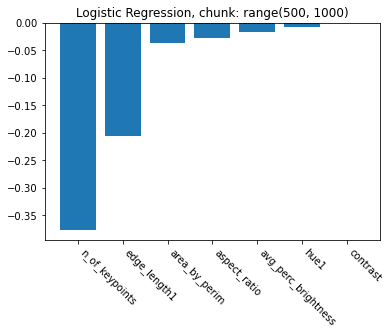

Decision Tree, chunk: range(500, 1000)
Feature: 0, Score: 0.96969
Feature: 1, Score: 0.00227
Feature: 2, Score: 0.00475
Feature: 3, Score: 0.00538
Feature: 4, Score: 0.00355
Feature: 5, Score: 0.01437
Feature: 6, Score: 0.00000


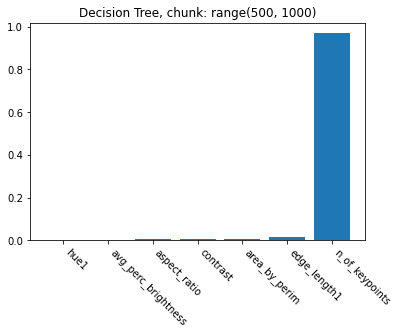

Logistic Regression, chunk: range(1000, 1500)
Feature: 0, Score: -0.37575
Feature: 1, Score: -0.00800
Feature: 2, Score: 0.00930
Feature: 3, Score: -0.03578
Feature: 4, Score: -0.02046
Feature: 5, Score: -0.17344
Feature: 6, Score: -0.00106


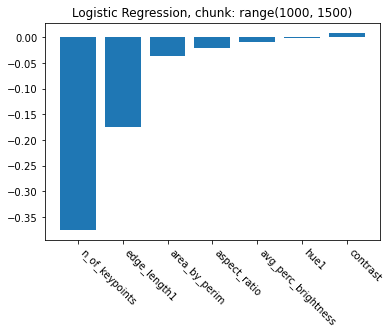

Decision Tree, chunk: range(1000, 1500)
Feature: 0, Score: 0.97056
Feature: 1, Score: 0.00142
Feature: 2, Score: 0.00358
Feature: 3, Score: 0.00075
Feature: 4, Score: 0.00629
Feature: 5, Score: 0.01740
Feature: 6, Score: 0.00000


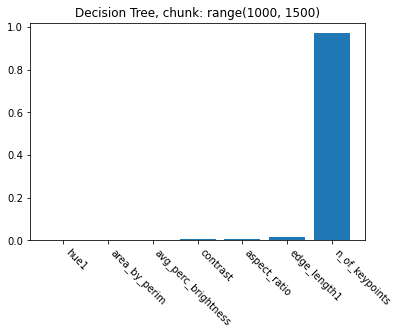

Logistic Regression, chunk: range(1500, 2000)
Feature: 0, Score: -0.37253
Feature: 1, Score: -0.01223
Feature: 2, Score: 0.00181
Feature: 3, Score: -0.03149
Feature: 4, Score: -0.02286
Feature: 5, Score: -0.19254
Feature: 6, Score: -0.00626


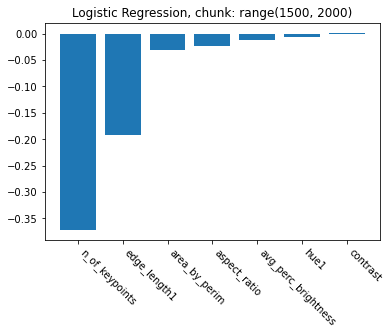

Decision Tree, chunk: range(1500, 2000)
Feature: 0, Score: 0.97113
Feature: 1, Score: 0.00186
Feature: 2, Score: 0.00345
Feature: 3, Score: 0.00358
Feature: 4, Score: 0.00205
Feature: 5, Score: 0.01793
Feature: 6, Score: 0.00000


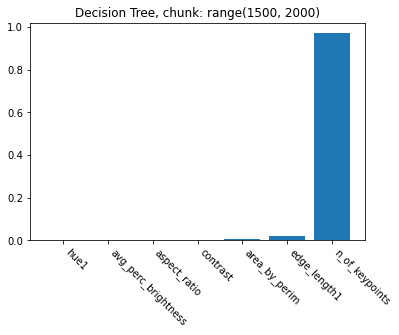

Logistic Regression, chunk: range(2000, 2500)
Feature: 0, Score: -0.38173
Feature: 1, Score: -0.00511
Feature: 2, Score: 0.00343
Feature: 3, Score: -0.03011
Feature: 4, Score: -0.02457
Feature: 5, Score: -0.18345
Feature: 6, Score: -0.00364


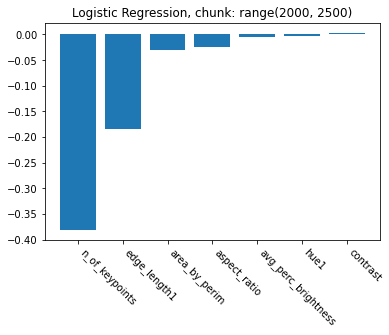

Decision Tree, chunk: range(2000, 2500)
Feature: 0, Score: 0.97305
Feature: 1, Score: 0.00402
Feature: 2, Score: 0.00308
Feature: 3, Score: 0.00240
Feature: 4, Score: 0.00069
Feature: 5, Score: 0.01676
Feature: 6, Score: 0.00000


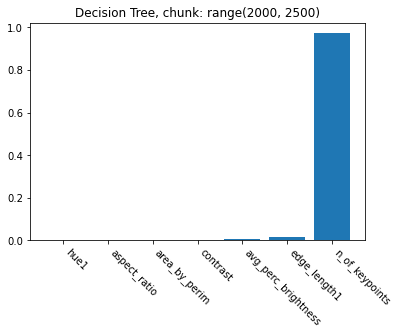

Logistic Regression, chunk: range(2500, 3000)
Feature: 0, Score: -0.37236
Feature: 1, Score: -0.00581
Feature: 2, Score: 0.00213
Feature: 3, Score: -0.03222
Feature: 4, Score: -0.01660
Feature: 5, Score: -0.16948
Feature: 6, Score: -0.00095


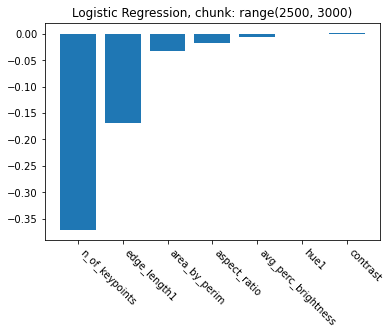

Decision Tree, chunk: range(2500, 3000)
Feature: 0, Score: 0.97021
Feature: 1, Score: 0.00284
Feature: 2, Score: 0.00158
Feature: 3, Score: 0.00471
Feature: 4, Score: 0.00378
Feature: 5, Score: 0.01687
Feature: 6, Score: 0.00000


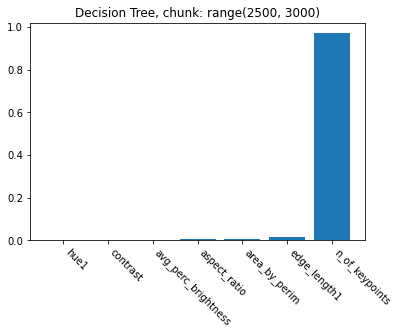

Logistic Regression, chunk: range(3000, 3500)
Feature: 0, Score: -0.36926
Feature: 1, Score: -0.00392
Feature: 2, Score: 0.00823
Feature: 3, Score: -0.03029
Feature: 4, Score: -0.01161
Feature: 5, Score: -0.14873
Feature: 6, Score: 0.00280


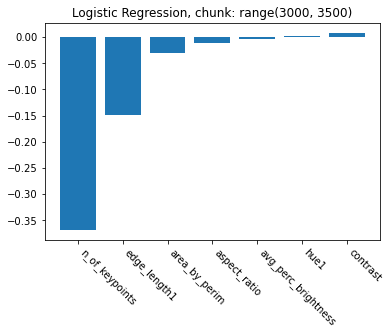

Decision Tree, chunk: range(3000, 3500)
Feature: 0, Score: 0.96736
Feature: 1, Score: 0.00528
Feature: 2, Score: 0.00405
Feature: 3, Score: 0.00307
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.02025
Feature: 6, Score: 0.00000


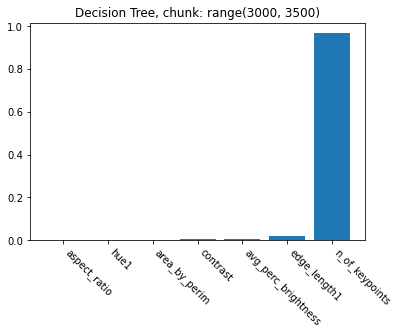

Logistic Regression, chunk: range(3500, 4000)
Feature: 0, Score: -0.37168
Feature: 1, Score: -0.00893
Feature: 2, Score: 0.00563
Feature: 3, Score: -0.02974
Feature: 4, Score: -0.02063
Feature: 5, Score: -0.16843
Feature: 6, Score: -0.00089


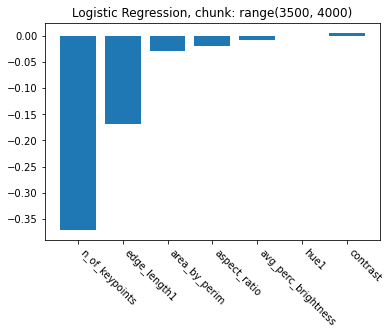

Decision Tree, chunk: range(3500, 4000)
Feature: 0, Score: 0.96520
Feature: 1, Score: 0.00278
Feature: 2, Score: 0.00453
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00711
Feature: 5, Score: 0.02037
Feature: 6, Score: 0.00000


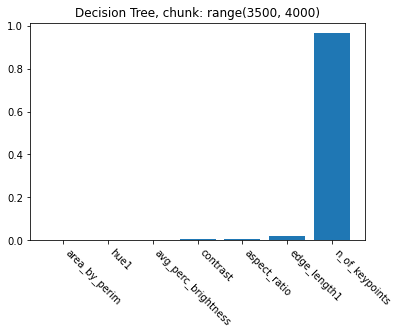

Logistic Regression, chunk: range(4000, 4500)
Feature: 0, Score: -0.37343
Feature: 1, Score: -0.00243
Feature: 2, Score: 0.00424
Feature: 3, Score: -0.03106
Feature: 4, Score: -0.02043
Feature: 5, Score: -0.17058
Feature: 6, Score: -0.00132


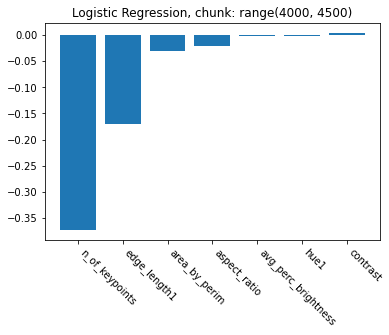

Decision Tree, chunk: range(4000, 4500)
Feature: 0, Score: 0.97081
Feature: 1, Score: 0.00181
Feature: 2, Score: 0.00537
Feature: 3, Score: 0.00651
Feature: 4, Score: 0.00203
Feature: 5, Score: 0.01348
Feature: 6, Score: 0.00000


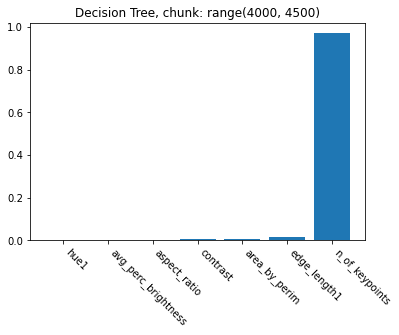

Logistic Regression, chunk: range(4500, 4999)
Feature: 0, Score: -0.37569
Feature: 1, Score: -0.00901
Feature: 2, Score: 0.00400
Feature: 3, Score: -0.03459
Feature: 4, Score: -0.02453
Feature: 5, Score: -0.18319
Feature: 6, Score: -0.00351


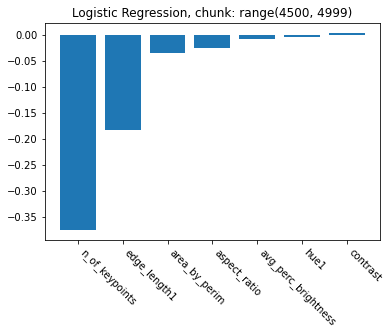

Decision Tree, chunk: range(4500, 4999)
Feature: 0, Score: 0.97153
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00302
Feature: 3, Score: 0.00493
Feature: 4, Score: 0.00451
Feature: 5, Score: 0.01602
Feature: 6, Score: 0.00000


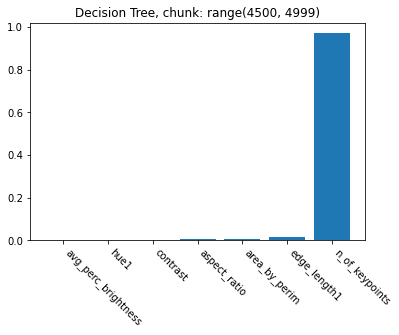

In [6]:
import matplotlib.pyplot as plt #Student's code
from sklearn import tree
for counter,(first_level_machine, second_level_machine, third_level_machine) in enumerate(list_premodels):
            # Split training data in k-fold chunks
            # Minimum needs to be 2
            k_fold = 10
            worker_threads = list()
            chunk_size = int(ceil(len(data) / float(k_fold)))    
            # Create a new thread for each fold
            for i, (test_idx, train_idx) in enumerate(util.chunkise(range(len(data)), chunk_size)):
                return_wrapper = list()
                X_train, _ = util.list_split(data, train_idx, [0])
                X_train_first_level = X_train
                X_train_second_level = X_train
                X_train_third_level = X_train


                Y_train, _ = util.list_split(data, test_idx, [0])
                Y_test_first_level, _ = util.list_split(first_level_data, test_idx, [0])
                Y_test_second_level, _ = util.list_split(second_level_data, test_idx, [0])
                Y_test_third_level, _ = util.list_split(third_level_data, test_idx, [0])

                X_test_first_level, _ = util.list_split(first_level_data, train_idx, [0])
                X_test_second_level, _ = util.list_split(second_level_data, train_idx, [0])
                X_test_third_level, _ = util.list_split(third_level_data, train_idx, [0])

                X_val_first_level = [X_test_first_level[i][1] for i in range(0,len(X_test_first_level))]
                Y_val_first_level = [Y_test_first_level[i][1] for i in range(0,len(Y_test_first_level))]

                X_val_second_level = [X_test_second_level[i][1] for i in range(0,len(X_test_second_level))]
                Y_val_second_level = [Y_test_second_level[i][1] for i in range(0,len(Y_test_second_level))]

                X_val_third_level = [X_test_third_level[i][1] for i in range(0,len(X_test_third_level))]
                Y_val_third_level = [Y_test_third_level[i][1] for i in range(0,len(Y_test_third_level))]

                for i in range(len(X_train_first_level)):
                    for j in range(len(X_train_first_level[i])):
                        X_train_first_level[i][j] = float(X_train_first_level[i][j])
                for i in range(len(X_val_first_level)):
                    X_val_first_level[i] = int(X_val_first_level[i])


                for i in range(len(X_train_second_level)):
                    for j in range(len(X_train_second_level[i])):
                        X_train_second_level[i][j] = float(X_train_second_level[i][j])
                for i in range(len(X_val_second_level)):
                    X_val_second_level[i] = int(X_val_second_level[i])



                for i in range(len(X_train_third_level)):
                    for j in range(len(X_train_third_level[i])):
                        X_train_third_level[i][j] = float(X_train_third_level[i][j])
                for i in range(len(X_val_third_level)):
                    X_val_third_level[i] = int(X_val_third_level[i])


                X_train_first_level = np.array(X_train_first_level)
                X_train_second_level = np.array(X_train_second_level)
                X_train_third_level = np.array(X_train_third_level)
                X_train_first_level = X_train_first_level.astype('float64')
                X_train_second_level = X_train_second_level.astype('float64')
                X_train_third_level = X_train_third_level.astype('float64')
                Y_train = np.array(Y_train)


                X_val_first_level = np.array(X_val_first_level)
                X_val_second_level = np.array(X_val_second_level)
                X_val_third_level = np.array(X_val_third_level)
                X_val_first_level = X_val_first_level.astype('int')
                X_val_second_level = X_val_second_level.astype('int')
                X_val_third_level = X_val_third_level.astype('int')



                #oversample = SMOTE()
                #X_train_first_level, X_val_first_level = oversample.fit_resample(X_train_first_level, X_val_first_level)


                #undersample = CondensedNearestNeighbour(n_neighbors=1)
                #undersample = TomekLinks()
                #undersample = EditedNearestNeighbours(n_neighbors=3)
                #undersample = OneSidedSelection(n_neighbors=1, n_seeds_S=200)
                undersample = NearMiss(version=1, n_neighbors=3)
            # transform the dataset
                X_train_first_level, X_val_first_level = undersample.fit_resample(X_train_first_level, X_val_first_level)

                X_train_second_level, X_val_second_level = undersample.fit_resample(X_train_second_level, X_val_second_level)

                X_train_third_level, X_val_third_level = undersample.fit_resample(X_train_third_level, X_val_third_level)



                list_predictions = []
                Y_train_second_level = []
                Y_train_second_level_position = []
                Y_train_third_level = []
                Y_train_third_level_position = []
                log_reg = LogisticRegression()                           #Logistic Regression feature importance
                #log_reg = LogisticRegression(class_weight = 'balanced')
                log_reg.fit(X_train_first_level, X_val_first_level)
                # Prediction
                predicted = log_reg.predict(Y_train)
                predicted = predicted.astype(int)
                importance = log_reg.coef_[0]
                d_lr = dict(zip(feature_list, importance))
                d_sorted_lr = {k: v for k, v in sorted(d_lr.items(), key=lambda item: item[1])}
                # summarize feature importance
                print("Logistic Regression, chunk: {}".format(test_idx))
                for i,v in enumerate(importance):
                    print('Feature: %0d, Score: %.5f' % (i,v))
                # plot feature importance
                plt.title("Logistic Regression, chunk: {}".format(test_idx))
                plt.bar(d_sorted_lr.keys(), d_sorted_lr.values())
                plt.xticks(rotation=-45, ha='left')
                plt.show()
                
                
                regr_2 = DecisionTreeRegressor(max_depth=2)    #DT feature importance
                regr_5 = DecisionTreeRegressor(max_depth=5)
                regr_8 = DecisionTreeRegressor(max_depth=8)
                regr_12 = DecisionTreeRegressor(max_depth=12)
                regr_16 = DecisionTreeRegressor(max_depth=16)

                # Fit tree
                regr_2.fit(X_train_first_level, X_val_first_level)
                regr_5.fit(X_train_first_level, X_val_first_level)
                regr_8.fit(X_train_first_level, X_val_first_level)
                regr_12.fit(X_train_first_level, X_val_first_level)
                regr_16.fit(X_train_first_level, X_val_first_level)

                # Predict
                predicted_level_2 = regr_2.predict(Y_train)
                predicted_level_5 = regr_5.predict(Y_train)
                predicted_level_8 = regr_8.predict(Y_train)
                predicted_level_12 = regr_12.predict(Y_train)
                predicted_level_16 = regr_16.predict(Y_train)
                importance = regr_16.feature_importances_
                d_dt = dict(zip(feature_list, importance))
                d_sorted_dt = {k: v for k, v in sorted(d_dt.items(), key=lambda item: item[1])}
                # Summarize feature importance
                print("Decision Tree, chunk: {}".format(test_idx))
                for i,v in enumerate(importance):
                    print('Feature: %0d, Score: %.5f' % (i,v))
                # Plot feature importance
                #importance.sort()
                plt.title("Decision Tree, chunk: {}".format(test_idx))
                plt.bar(d_sorted_dt.keys(), d_sorted_dt.values())
                plt.xticks(rotation=-45, ha='left')
                plt.show()

In [7]:
print(d_sorted_lr)
print(d_sorted_dt)

{'n_of_keypoints': -0.37569330602120454, 'edge_length1': -0.18319047656119805, 'area_by_perim': -0.03459135952610013, 'aspect_ratio': -0.024531284080123374, 'avg_perc_brightness': -0.009013953203266322, 'hue1': -0.00351371370900884, 'contrast': 0.0039970486315958845}
{'avg_perc_brightness': 0.0, 'hue1': 0.0, 'contrast': 0.003019018070261503, 'aspect_ratio': 0.004509107383742462, 'area_by_perim': 0.0049251087802628666, 'edge_length1': 0.016015202164005725, 'n_of_keypoints': 0.9715315636017275}


In [8]:
print(X_train_first_level[1])

[-0.36778316 -0.36812212 -0.36781019 -0.36821161 -0.36827329  2.43952145
 -0.3681616 ]


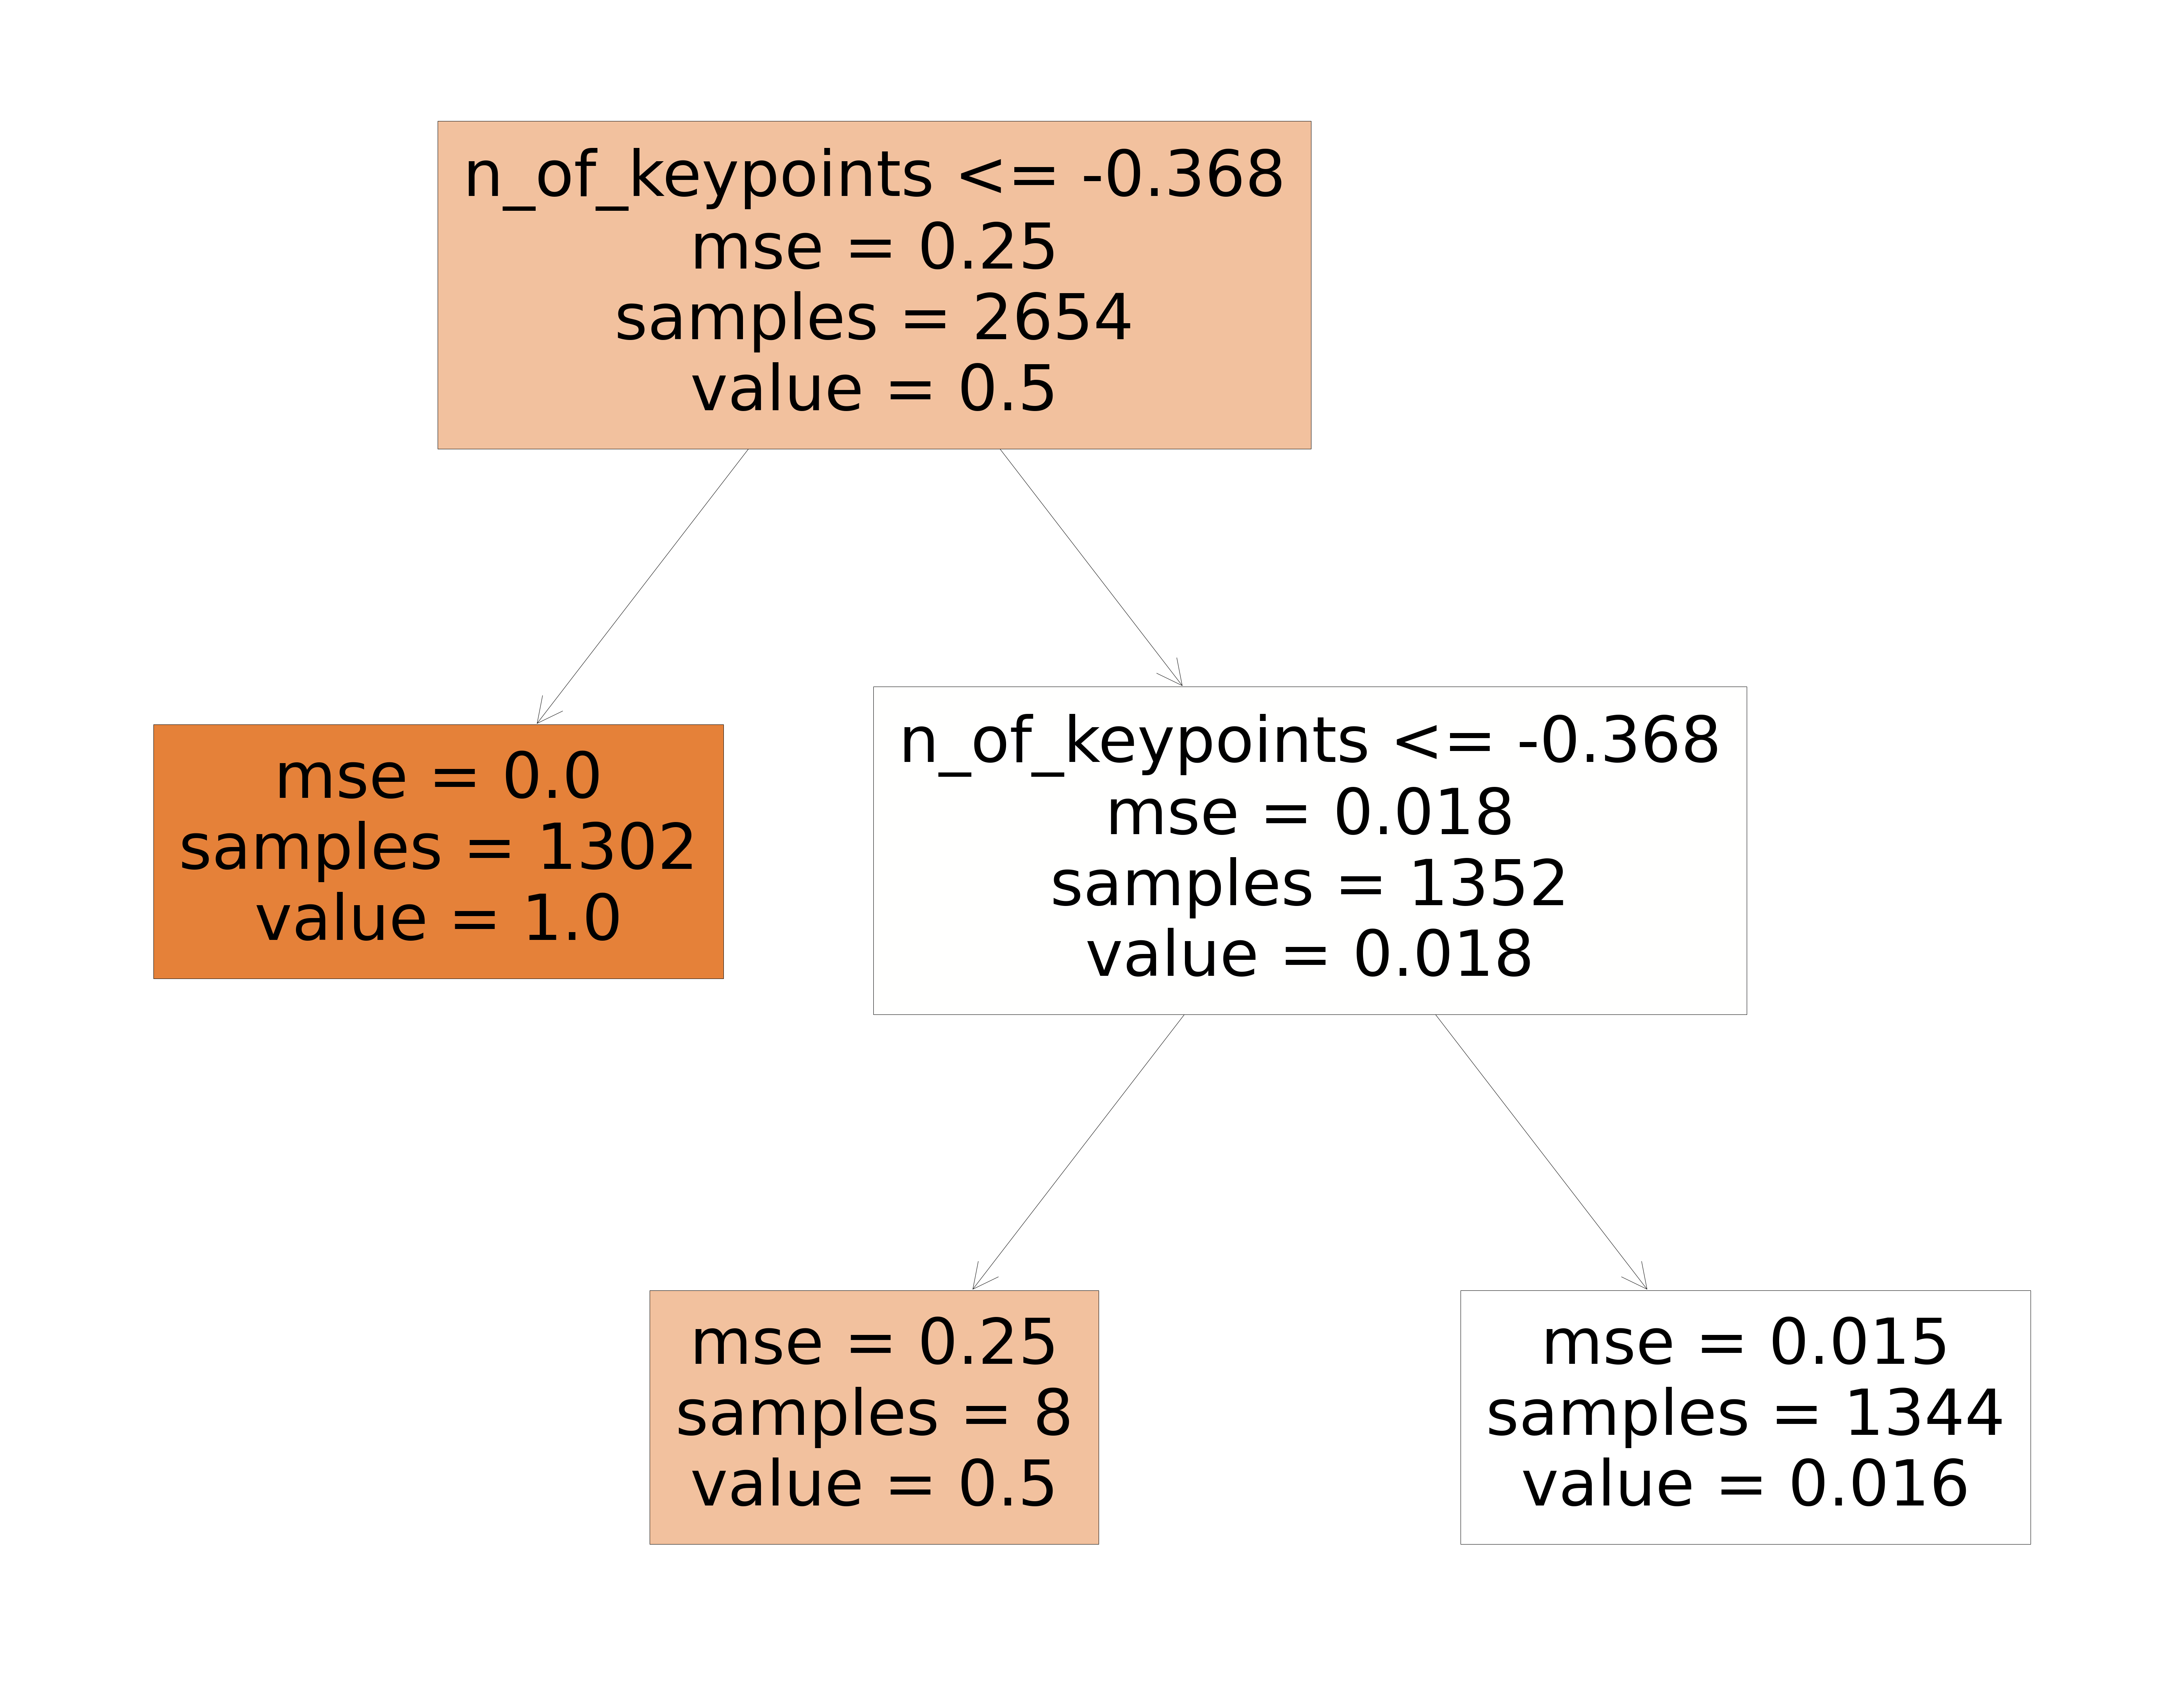

In [9]:
fig = plt.figure(figsize=(100,80))
_ = tree.plot_tree(regr_2, feature_names=feature_list, filled=True)



In [10]:
fig = plt.figure(figsize=(200, 160))
_ = tree.plot_tree(regr_16, feature_names=feature_list, filled=True)

In [11]:
#fig.savefig("decistion_tree5000.png") #if you want to download the visualization of a tree

In [12]:
text_representation = tree.export_text(regr_16, feature_names=feature_list)
print(text_representation)

|--- n_of_keypoints <= -0.37
|   |--- value: [1.00]
|--- n_of_keypoints >  -0.37
|   |--- n_of_keypoints <= -0.37
|   |   |--- contrast <= -0.37
|   |   |   |--- value: [0.00]
|   |   |--- contrast >  -0.37
|   |   |   |--- edge_length1 <= 3.55
|   |   |   |   |--- value: [1.00]
|   |   |   |--- edge_length1 >  3.55
|   |   |   |   |--- value: [0.00]
|   |--- n_of_keypoints >  -0.37
|   |   |--- n_of_keypoints <= -0.37
|   |   |   |--- edge_length1 <= 2.40
|   |   |   |   |--- value: [0.00]
|   |   |   |--- edge_length1 >  2.40
|   |   |   |   |--- edge_length1 <= 3.73
|   |   |   |   |   |--- area_by_perim <= -0.37
|   |   |   |   |   |   |--- edge_length1 <= 2.82
|   |   |   |   |   |   |   |--- aspect_ratio <= -0.37
|   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |   |--- aspect_ratio >  -0.37
|   |   |   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |   |--- edge_length1 >  2.82
|   |   |   |   |   |   |   |--- aspect_ratio <= -0.37
|   |   |

Logistic Regression, chunk: range(0, 500)
Feature: n_of_keypoints, Score: -0.5309041656518947
Feature: contrast, Score: -0.02101725671361786
Feature: aspect_ratio, Score: -0.017824935043042778
Feature: hue1, Score: 8.380237672494595e-05
Feature: area_by_perim, Score: 0.0017303693194502634
Feature: avg_perc_brightness, Score: 0.015066823940582896
Feature: edge_length1, Score: 0.04098381000241397


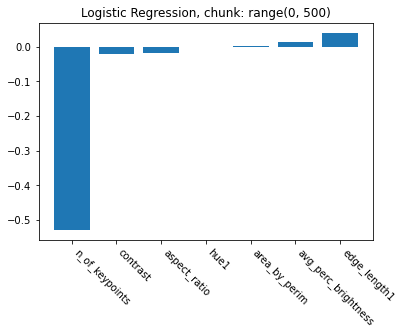

Decision Tree, chunk: range(0, 500)
Feature: hue1, Score: 0.0
Feature: aspect_ratio, Score: 0.005940746461187951
Feature: area_by_perim, Score: 0.00864375204202302
Feature: avg_perc_brightness, Score: 0.01001907454296055
Feature: contrast, Score: 0.010096468916607138
Feature: edge_length1, Score: 0.06208139704946918
Feature: n_of_keypoints, Score: 0.903218560987752


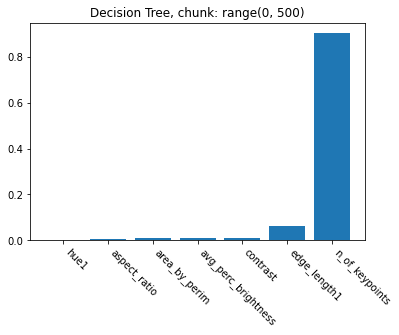

Logistic Regression, chunk: range(500, 1000)
Feature: n_of_keypoints, Score: -0.5223052084723354
Feature: contrast, Score: -0.01965465546705901
Feature: aspect_ratio, Score: -0.018112676547591397
Feature: hue1, Score: 4.9304317934372894e-05
Feature: avg_perc_brightness, Score: 0.008331933605852188
Feature: area_by_perim, Score: 0.01015291699984885
Feature: edge_length1, Score: 0.049125846266715435


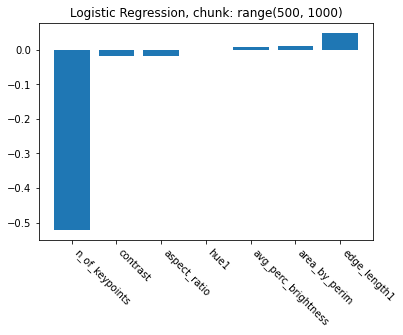

Decision Tree, chunk: range(500, 1000)
Feature: hue1, Score: 0.0
Feature: aspect_ratio, Score: 0.0050740348561305
Feature: avg_perc_brightness, Score: 0.006867537548562109
Feature: area_by_perim, Score: 0.009482130841808373
Feature: contrast, Score: 0.01022683808410803
Feature: edge_length1, Score: 0.05324186520799103
Feature: n_of_keypoints, Score: 0.9151075934614001


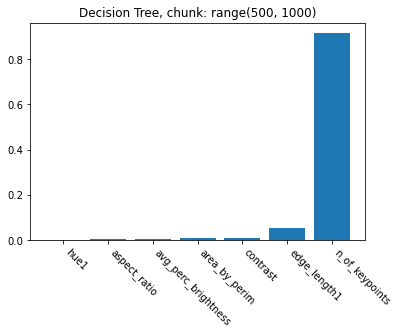

Logistic Regression, chunk: range(1000, 1500)
Feature: n_of_keypoints, Score: -0.5626618423768983
Feature: aspect_ratio, Score: -0.044018048830768965
Feature: contrast, Score: -0.04100621624469083
Feature: hue1, Score: -0.021785940237042285
Feature: avg_perc_brightness, Score: -0.015239699738756954
Feature: area_by_perim, Score: -0.014323064406458573
Feature: edge_length1, Score: 0.06537405051418037


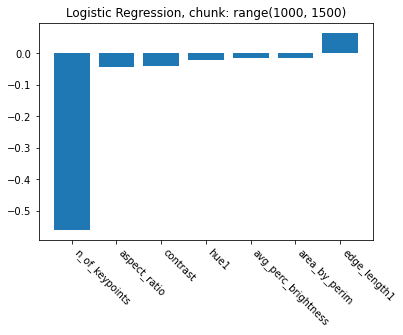

Decision Tree, chunk: range(1000, 1500)
Feature: hue1, Score: 0.0
Feature: avg_perc_brightness, Score: 0.0052843520419172015
Feature: contrast, Score: 0.009499318163240716
Feature: aspect_ratio, Score: 0.010051256592101912
Feature: area_by_perim, Score: 0.011116520756524695
Feature: edge_length1, Score: 0.05646563533594813
Feature: n_of_keypoints, Score: 0.9075829171102674


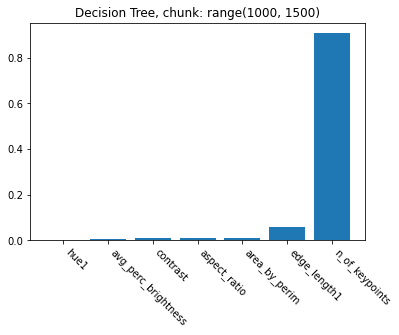

Logistic Regression, chunk: range(1500, 2000)
Feature: n_of_keypoints, Score: -0.5637950016807685
Feature: contrast, Score: -0.05560878457328601
Feature: aspect_ratio, Score: -0.04217157465811161
Feature: hue1, Score: -0.025507712283914966
Feature: avg_perc_brightness, Score: -0.01703844758750997
Feature: area_by_perim, Score: -0.012264383671622454
Feature: edge_length1, Score: 0.04898779629676151


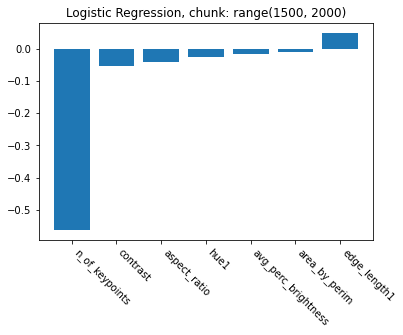

Decision Tree, chunk: range(1500, 2000)
Feature: hue1, Score: 0.0
Feature: aspect_ratio, Score: 0.0037597874872955634
Feature: area_by_perim, Score: 0.01067892575020263
Feature: avg_perc_brightness, Score: 0.010724319476782544
Feature: contrast, Score: 0.011251028641774338
Feature: edge_length1, Score: 0.05360911433644813
Feature: n_of_keypoints, Score: 0.9099768243074968


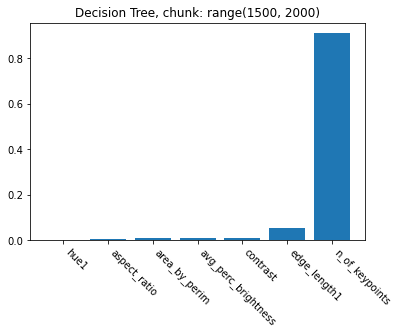

Logistic Regression, chunk: range(2000, 2500)
Feature: n_of_keypoints, Score: -0.5351832485754043
Feature: contrast, Score: -0.02819195516634466
Feature: aspect_ratio, Score: -0.02197809544298815
Feature: hue1, Score: -2.9867401894174235e-05
Feature: area_by_perim, Score: 0.008429891175548009
Feature: avg_perc_brightness, Score: 0.01645859095564436
Feature: edge_length1, Score: 0.05380528054304231


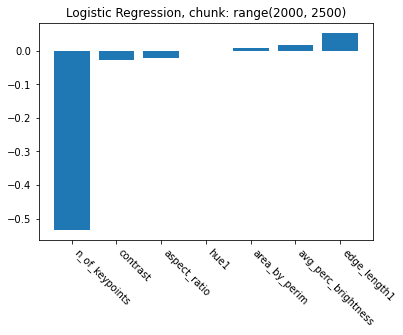

Decision Tree, chunk: range(2000, 2500)
Feature: hue1, Score: 0.0
Feature: avg_perc_brightness, Score: 0.003979745596477053
Feature: aspect_ratio, Score: 0.006357807798263565
Feature: area_by_perim, Score: 0.007388023635300284
Feature: contrast, Score: 0.01059803309927144
Feature: edge_length1, Score: 0.03683161542797775
Feature: n_of_keypoints, Score: 0.9348447744427099


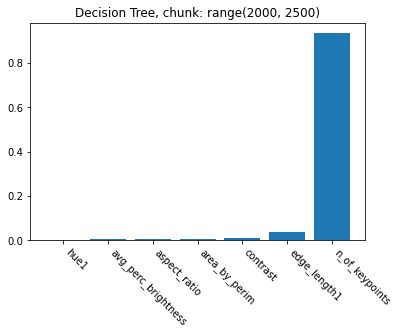

Logistic Regression, chunk: range(2500, 3000)
Feature: n_of_keypoints, Score: -0.5294875207310084
Feature: contrast, Score: -0.027798703896197516
Feature: aspect_ratio, Score: -0.017947362092783088
Feature: hue1, Score: 4.987558071812397e-05
Feature: area_by_perim, Score: 0.0012478308134885505
Feature: avg_perc_brightness, Score: 0.006890398063125572
Feature: edge_length1, Score: 0.05622329339763591


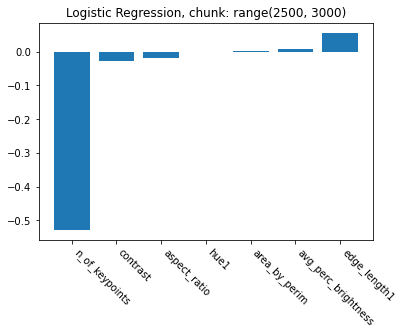

Decision Tree, chunk: range(2500, 3000)
Feature: hue1, Score: 0.0
Feature: avg_perc_brightness, Score: 0.006481805394461823
Feature: contrast, Score: 0.006646669813725198
Feature: aspect_ratio, Score: 0.008611562476638943
Feature: area_by_perim, Score: 0.00982994315842523
Feature: edge_length1, Score: 0.057032521840578485
Feature: n_of_keypoints, Score: 0.9113974973161703


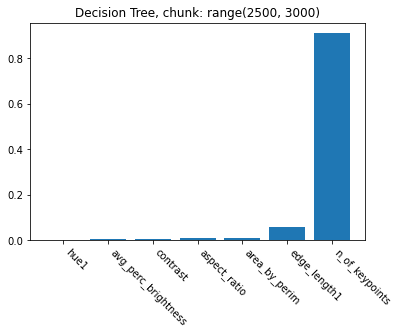

Logistic Regression, chunk: range(3000, 3500)
Feature: n_of_keypoints, Score: -0.5680137532860003
Feature: contrast, Score: -0.052097343330079975
Feature: aspect_ratio, Score: -0.03773642868237369
Feature: hue1, Score: -0.024219337929776083
Feature: area_by_perim, Score: -0.018499525428248672
Feature: avg_perc_brightness, Score: -0.012462705729263793
Feature: edge_length1, Score: 0.054672372969419236


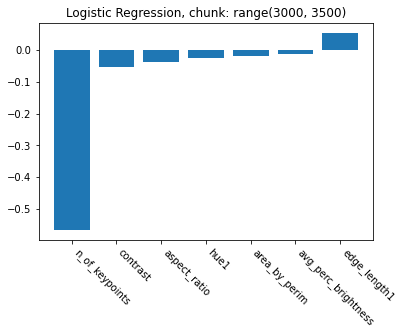

Decision Tree, chunk: range(3000, 3500)
Feature: hue1, Score: 0.0
Feature: avg_perc_brightness, Score: 0.002750149168994765
Feature: area_by_perim, Score: 0.007366231496095768
Feature: aspect_ratio, Score: 0.00896000573164558
Feature: contrast, Score: 0.01469239012697747
Feature: edge_length1, Score: 0.06896263327011434
Feature: n_of_keypoints, Score: 0.897268590206172


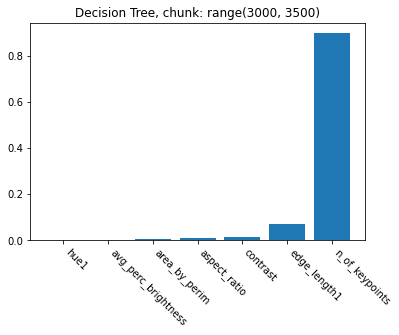

Logistic Regression, chunk: range(3500, 4000)
Feature: n_of_keypoints, Score: -0.5629666274224163
Feature: contrast, Score: -0.0499678142594663
Feature: aspect_ratio, Score: -0.04120217634551383
Feature: hue1, Score: -0.02313229646900408
Feature: area_by_perim, Score: -0.01744241599685947
Feature: avg_perc_brightness, Score: -0.015089035952253796
Feature: edge_length1, Score: 0.055355889073228505


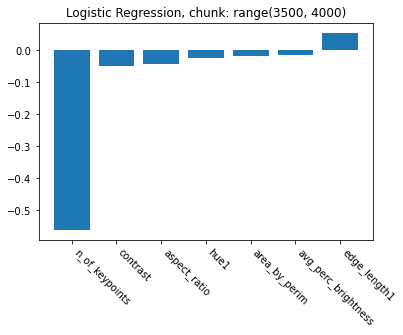

Decision Tree, chunk: range(3500, 4000)
Feature: hue1, Score: 0.0
Feature: aspect_ratio, Score: 0.006635430956448676
Feature: area_by_perim, Score: 0.007010585909846847
Feature: contrast, Score: 0.007948842333647179
Feature: avg_perc_brightness, Score: 0.00961017921551201
Feature: edge_length1, Score: 0.059333686491071506
Feature: n_of_keypoints, Score: 0.9094612750934737


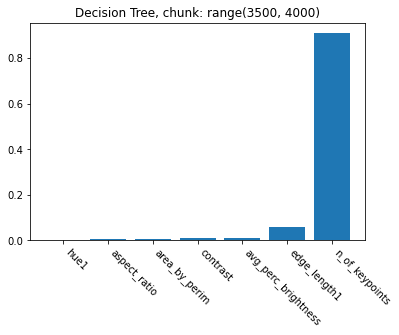

Logistic Regression, chunk: range(4000, 4500)
Feature: n_of_keypoints, Score: -0.5606677243677711
Feature: contrast, Score: -0.045062396887956546
Feature: aspect_ratio, Score: -0.04080742343280081
Feature: hue1, Score: -0.021128078470981356
Feature: area_by_perim, Score: -0.011044796188267855
Feature: avg_perc_brightness, Score: -0.006412964210068512
Feature: edge_length1, Score: 0.06621631845258182


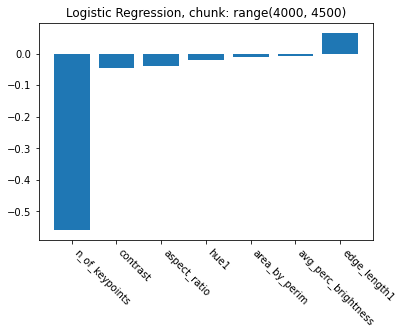

Decision Tree, chunk: range(4000, 4500)
Feature: hue1, Score: 0.0
Feature: avg_perc_brightness, Score: 0.008071847430105875
Feature: contrast, Score: 0.008436395292567244
Feature: aspect_ratio, Score: 0.009366885224729856
Feature: area_by_perim, Score: 0.012346024535694633
Feature: edge_length1, Score: 0.05860077455221526
Feature: n_of_keypoints, Score: 0.9031780729646872


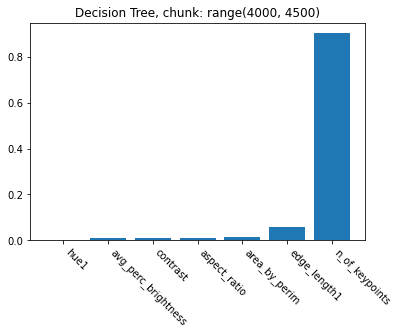

Logistic Regression, chunk: range(4500, 4999)
Feature: n_of_keypoints, Score: -0.5288625552099473
Feature: contrast, Score: -0.02690336884638694
Feature: aspect_ratio, Score: -0.02225483093752254
Feature: hue1, Score: 3.41291095438277e-05
Feature: area_by_perim, Score: 0.008831766323966771
Feature: avg_perc_brightness, Score: 0.011817660048634028
Feature: edge_length1, Score: 0.037718323642438996


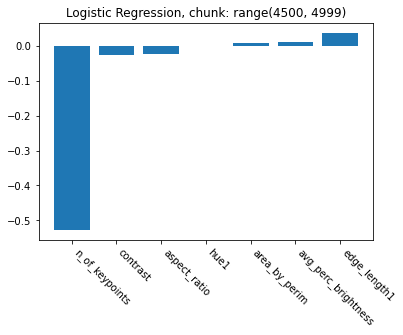

Decision Tree, chunk: range(4500, 4999)
Feature: hue1, Score: 0.0
Feature: avg_perc_brightness, Score: 0.006594286645008796
Feature: aspect_ratio, Score: 0.008329172477402171
Feature: area_by_perim, Score: 0.008916128008642553
Feature: contrast, Score: 0.01328495113372343
Feature: edge_length1, Score: 0.06495614820789691
Feature: n_of_keypoints, Score: 0.8979193135273262


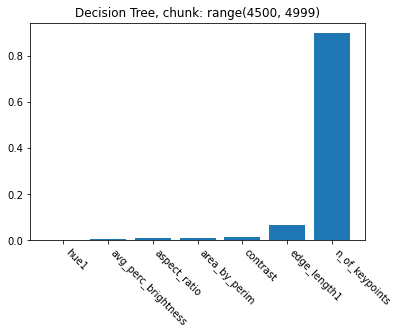

In [13]:
import matplotlib.pyplot as plt #Authors' code
from sklearn import tree
for counter,(first_level_machine, second_level_machine, third_level_machine) in enumerate(list_premodels):
            # Split training data in k-fold chunks
            # Minimum needs to be 2
            k_fold = 10
            worker_threads = list()
            chunk_size = int(ceil(len(data) / float(k_fold)))    
            # Create a new thread for each fold
            for i, (test_idx, train_idx) in enumerate(util.chunkise(range(len(data)), chunk_size)):
                return_wrapper = list()
                X_train, _ = util.list_split(data, train_idx, [0])

                Y_train, _ = util.list_split(data, test_idx, [0])
                Y_test_first_level, _ = util.list_split(first_level_data, test_idx, [0])
                Y_test_second_level, _ = util.list_split(second_level_data, test_idx, [0])
                Y_test_third_level, _ = util.list_split(third_level_data, test_idx, [0])

                X_test_first_level, _ = util.list_split(first_level_data, train_idx, [0])
                X_test_second_level, _ = util.list_split(second_level_data, train_idx, [0])
                X_test_third_level, _ = util.list_split(third_level_data, train_idx, [0])

                X_val_first_level = [X_test_first_level[i][1] for i in range(0,len(X_test_first_level))]
                Y_val_first_level = [Y_test_first_level[i][1] for i in range(0,len(Y_test_first_level))]

                X_val_second_level = [X_test_second_level[i][1] for i in range(0,len(X_test_second_level))]
                Y_val_second_level = [Y_test_second_level[i][1] for i in range(0,len(Y_test_second_level))]

                X_val_third_level = [X_test_third_level[i][1] for i in range(0,len(X_test_third_level))]
                Y_val_third_level = [Y_test_third_level[i][1] for i in range(0,len(Y_test_third_level))]

                list_predictions = []
                Y_train_second_level = []
                Y_train_second_level_position = []
                Y_train_third_level = []
                Y_train_third_level_position = []
                
                
                log_reg = LogisticRegression()                           #Logistic Regression feature importance
                #log_reg = LogisticRegression(class_weight = 'balanced')
                log_reg.fit(X_train, X_val_first_level)
                # Prediction
                predicted = log_reg.predict(Y_train)
                predicted = predicted.astype(int)
                importance = log_reg.coef_[0]
                d_author_lr = dict(zip(feature_list, importance))
                d_sorted_author_lr = {k: v for k, v in sorted(d_author_lr.items(), key=lambda item: item[1])}
                # summarize feature importance
                print("Logistic Regression, chunk: {}".format(test_idx))
                for i,v in zip(d_sorted_author_lr.keys(), d_sorted_author_lr.values()):
                    print('Feature: {}, Score: {}'.format(i,v))
                # plot feature importance
                plt.title("Logistic Regression, chunk: {}".format(test_idx))
                plt.bar(d_sorted_author_lr.keys(), d_sorted_author_lr.values())
                plt.xticks(rotation=-45, ha='left')
                plt.show()
                
                
                regr_2 = DecisionTreeRegressor(max_depth=2)    #DT feature importance
                regr_5 = DecisionTreeRegressor(max_depth=5)
                regr_8 = DecisionTreeRegressor(max_depth=8)
                regr_12 = DecisionTreeRegressor(max_depth=12)
                regr_16 = DecisionTreeRegressor(max_depth=16)

                # Fit tree
                regr_2.fit(X_train, X_val_first_level)
                regr_5.fit(X_train, X_val_first_level)
                regr_8.fit(X_train, X_val_first_level)
                regr_12.fit(X_train, X_val_first_level)
                regr_16.fit(X_train, X_val_first_level)

                # Predict
                predicted_level_2 = regr_2.predict(Y_train)
                predicted_level_5 = regr_5.predict(Y_train)
                predicted_level_8 = regr_8.predict(Y_train)
                predicted_level_12 = regr_12.predict(Y_train)
                predicted_level_16 = regr_16.predict(Y_train)
                importance = regr_16.feature_importances_
                d_author_dt = dict(zip(feature_list, importance))
                d_sorted_author_dt = {k: v for k, v in sorted(d_author_dt.items(), key=lambda item: item[1])}
                # Summarize feature importance
                print("Decision Tree, chunk: {}".format(test_idx))
                for i,v in zip(d_sorted_author_dt.keys(), d_sorted_author_dt.values()):
                    print('Feature: {}, Score: {}'.format(i,v))
                # Plot feature importance
                #importance.sort()
                plt.title("Decision Tree, chunk: {}".format(test_idx))
                plt.bar(d_sorted_author_dt.keys(), d_sorted_author_dt.values())
                plt.xticks(rotation=-45, ha='left')
                plt.show()

In [14]:
print(d_lr)
print(d_author_lr)
print(d_dt)
print(d_author_dt)

{'n_of_keypoints': -0.37569330602120454, 'avg_perc_brightness': -0.009013953203266322, 'contrast': 0.0039970486315958845, 'area_by_perim': -0.03459135952610013, 'aspect_ratio': -0.024531284080123374, 'edge_length1': -0.18319047656119805, 'hue1': -0.00351371370900884}
{'n_of_keypoints': -0.5288625552099473, 'avg_perc_brightness': 0.011817660048634028, 'contrast': -0.02690336884638694, 'area_by_perim': 0.008831766323966771, 'aspect_ratio': -0.02225483093752254, 'edge_length1': 0.037718323642438996, 'hue1': 3.41291095438277e-05}
{'n_of_keypoints': 0.9715315636017275, 'avg_perc_brightness': 0.0, 'contrast': 0.003019018070261503, 'area_by_perim': 0.0049251087802628666, 'aspect_ratio': 0.004509107383742462, 'edge_length1': 0.016015202164005725, 'hue1': 0.0}
{'n_of_keypoints': 0.8979193135273262, 'avg_perc_brightness': 0.006594286645008796, 'contrast': 0.01328495113372343, 'area_by_perim': 0.008916128008642553, 'aspect_ratio': 0.008329172477402171, 'edge_length1': 0.06495614820789691, 'hue1':

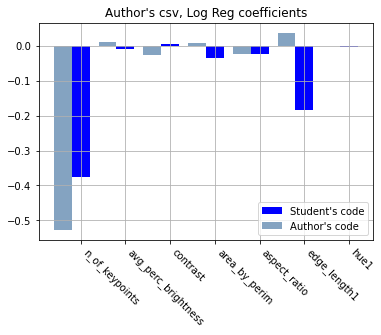

In [15]:
x = np.arange(len(d_sorted_lr))
if csv== 'Author':
    plt.title("Author's csv, Log Reg coefficients")
else: 
    plt.title("Student's csv, Log Reg coefficients")
plt.grid()
plt.bar(x, d_lr.values(), width=0.4, color='b')
plt.bar(x-0.4, d_author_lr.values(), width=0.4, color=(0.2, 0.4, 0.6, 0.6))
# plt.bar(d_sorted_lr.keys(), d_sorted_lr.values(), label="Author's code")
# plt.bar(d_sorted_author_lr.keys(), d_sorted_author_lr.values(), label="Author's code")
# plt.xticks(rotation=-45, ha='left')
plt.legend(("Student's code", "Author's code"))
plt.xticks([0,1,2,3,4,5,6], feature_list, rotation=-45, ha='left')
plt.show()

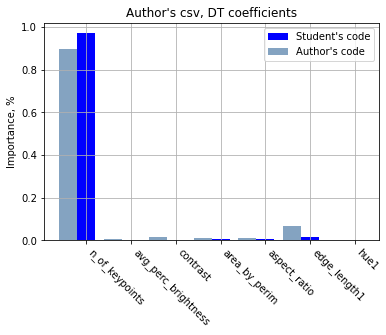

In [22]:
x = np.arange(len(d_sorted_dt))
if csv== 'Author':
    plt.title("Author's csv, DT coefficients")
else: 
    plt.title("Student's csv, DT coefficients")
plt.grid()
plt.bar(x, d_dt.values(), width=0.4, color='b')
plt.bar(x-0.4, d_author_dt.values(), width=0.4, color=(0.2, 0.4, 0.6, 0.6))
# plt.bar(d_sorted_lr.keys(), d_sorted_lr.values(), label="Author's code")
# plt.bar(d_sorted_author_lr.keys(), d_sorted_author_lr.values(), label="Author's code")
# plt.xticks(rotation=-45, ha='left')
plt.legend(("Student's code", "Author's code"))
plt.xticks([0,1,2,3,4,5,6], feature_list, rotation=-45, ha='left')
plt.ylabel('Importance, %')
plt.show()

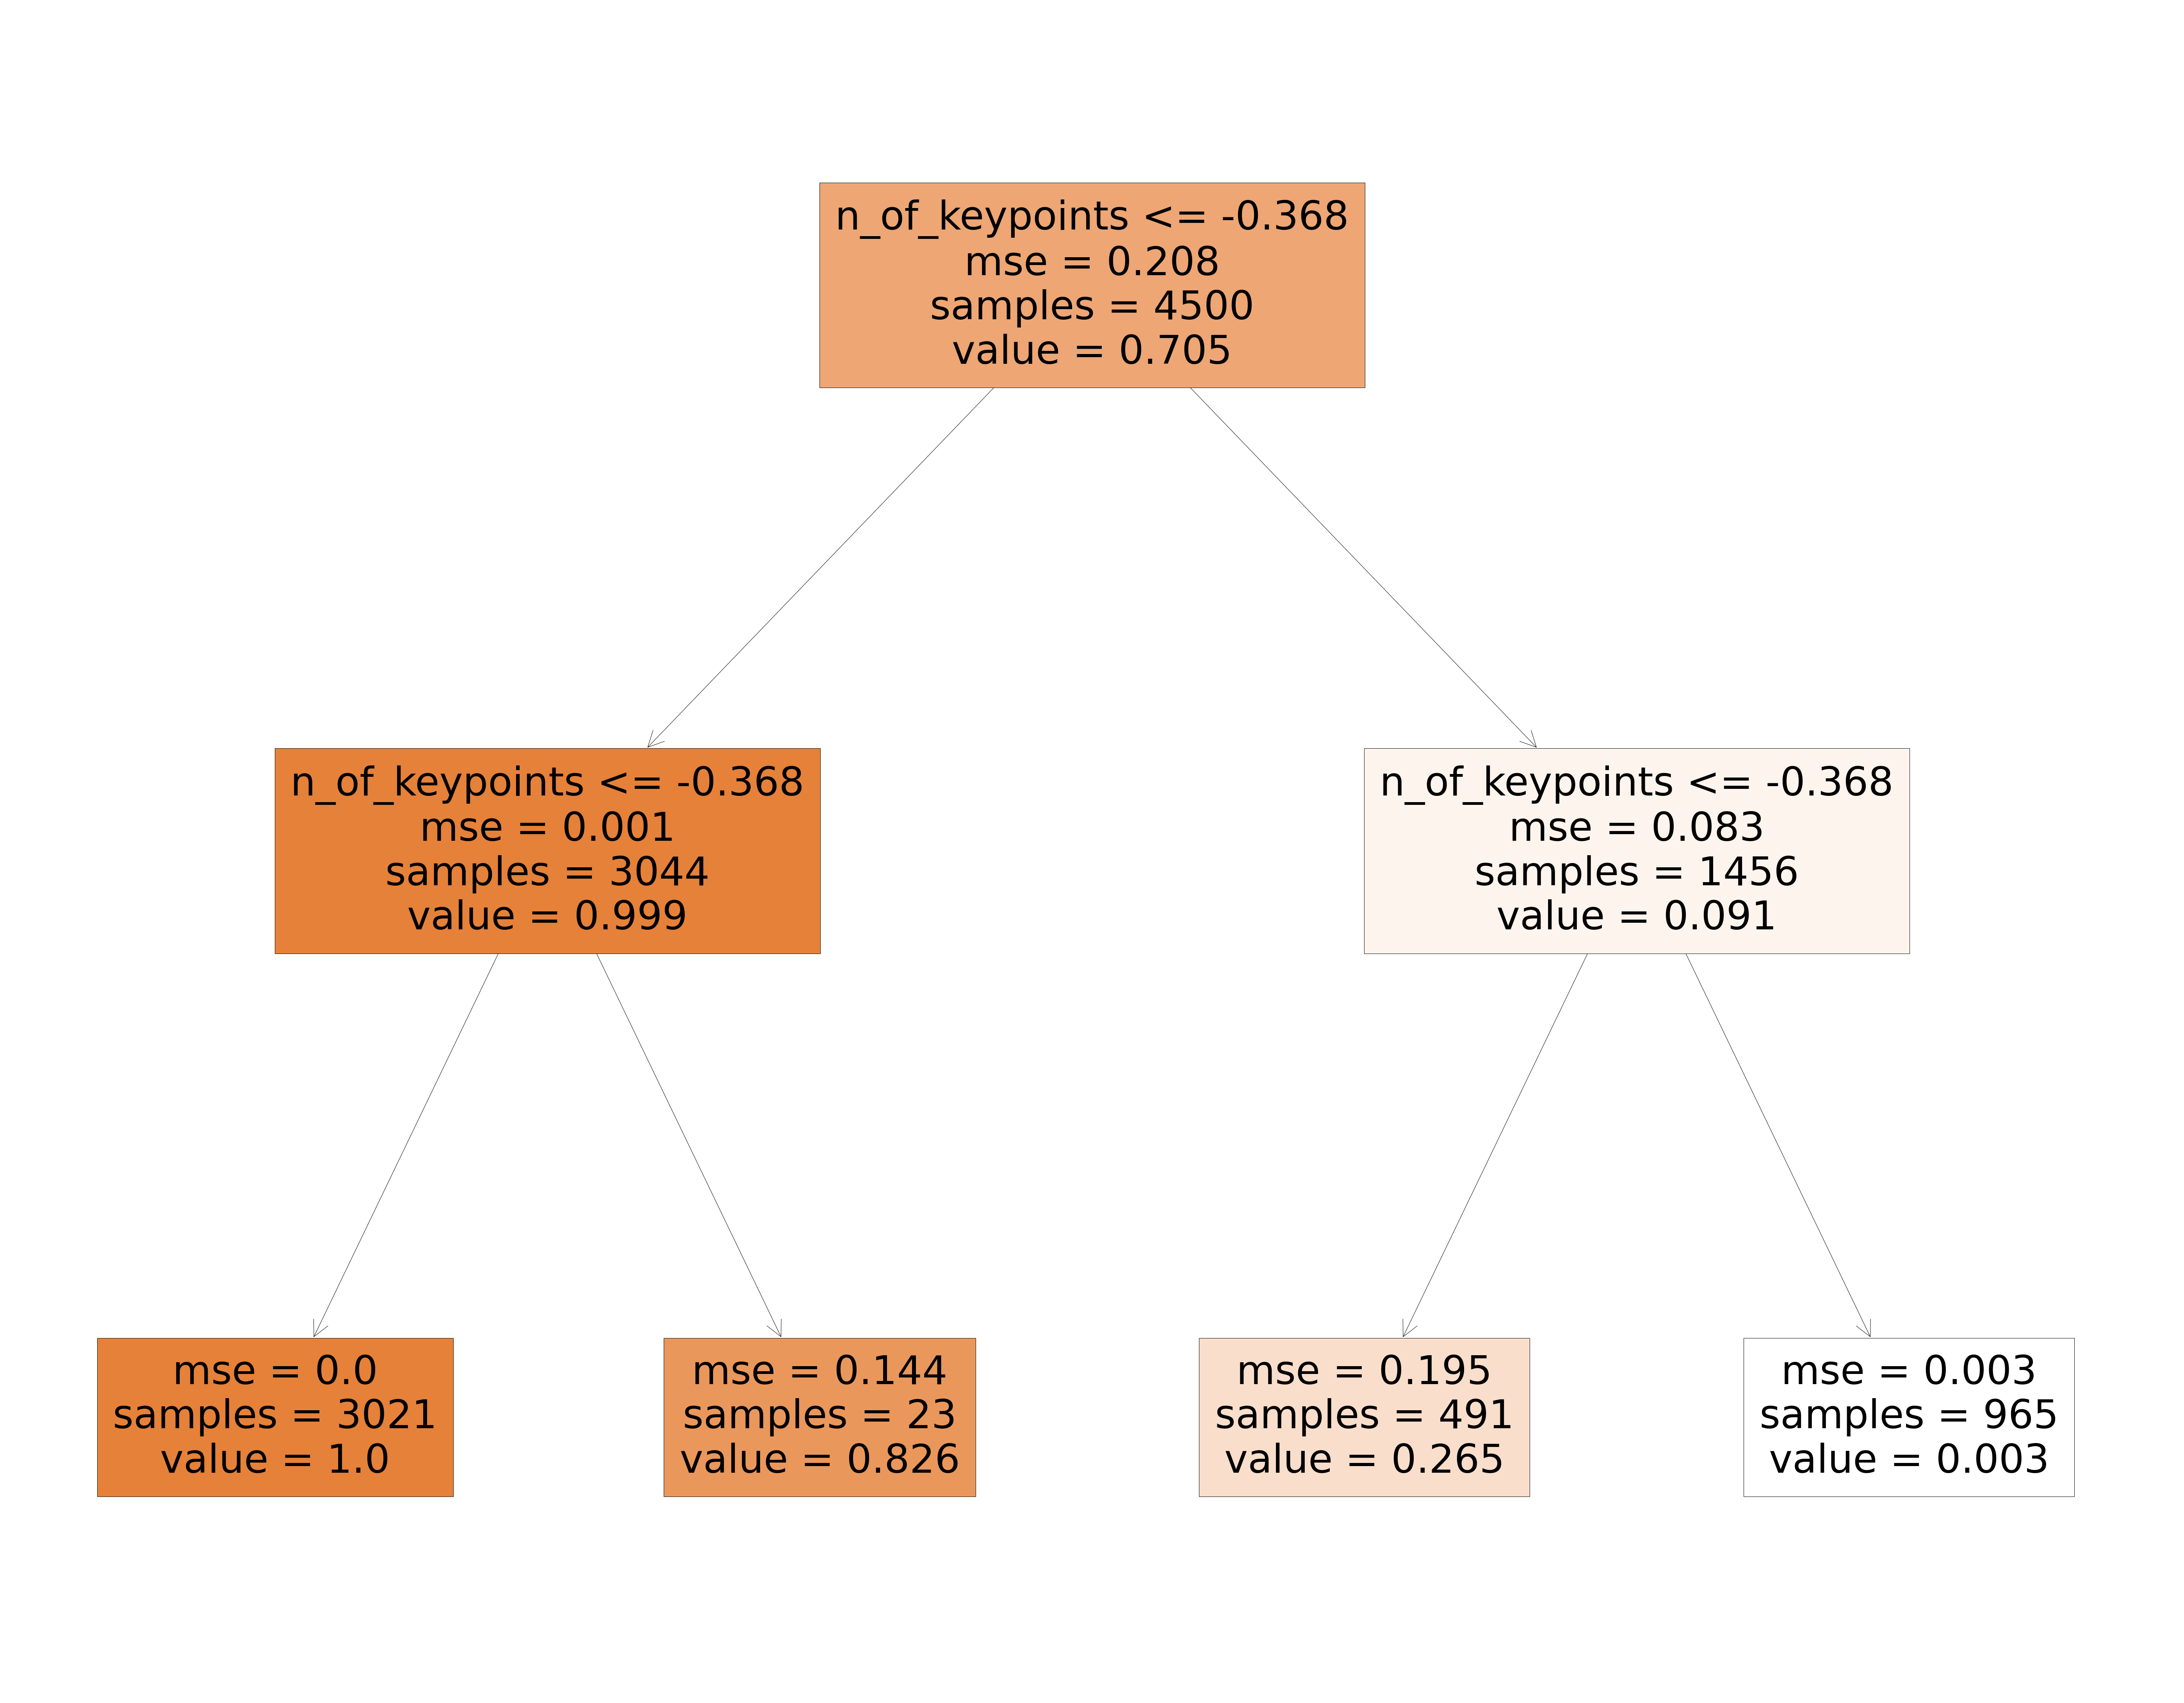

In [17]:
fig = plt.figure(figsize=(100,80))
_ = tree.plot_tree(regr_2, feature_names=feature_list, filled=True)


In [ ]:
# fig = plt.figure(figsize=(200, 160))
# _ = tree.plot_tree(regr_16, feature_names=feature_list, filled=True)

In [19]:
text_representation = tree.export_text(regr_16, feature_names=feature_list)
print(text_representation)

|--- n_of_keypoints <= -0.37
|   |--- n_of_keypoints <= -0.37
|   |   |--- value: [1.00]
|   |--- n_of_keypoints >  -0.37
|   |   |--- contrast <= -0.37
|   |   |   |--- area_by_perim <= -0.37
|   |   |   |   |--- value: [1.00]
|   |   |   |--- area_by_perim >  -0.37
|   |   |   |   |--- value: [0.00]
|   |   |--- contrast >  -0.37
|   |   |   |--- area_by_perim <= -0.37
|   |   |   |   |--- value: [0.00]
|   |   |   |--- area_by_perim >  -0.37
|   |   |   |   |--- area_by_perim <= -0.37
|   |   |   |   |   |--- value: [1.00]
|   |   |   |   |--- area_by_perim >  -0.37
|   |   |   |   |   |--- aspect_ratio <= -0.37
|   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |--- aspect_ratio >  -0.37
|   |   |   |   |   |   |--- value: [1.00]
|--- n_of_keypoints >  -0.37
|   |--- n_of_keypoints <= -0.37
|   |   |--- edge_length1 <= 2.45
|   |   |   |--- edge_length1 <= 1.50
|   |   |   |   |--- value: [0.00]
|   |   |   |--- edge_length1 >  1.50
|   |   |   |   |--- avg_perc_brightn

In [20]:
print(X_train_first_level[0])

[-0.36769956 -0.36760043 -0.36805439 -0.36820286 -0.36825804  1.60389395
 -0.3681616 ]
